<a href="https://colab.research.google.com/github/AnkitPatel745/Credit-Card-Default-Prediction-Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


##**Step1:Data Cleaning And Preprocessing**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Importing Warings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading The Data which is sotred in the df variable 
df = pd.read_excel("/content/drive/MyDrive/Datasets/default of credit card clients.xls",header=1)

In [ ]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)
""" Visualize the Numerical Features """
def visualize_num_feature(df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df, bins=30)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(df):
    stat =  df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

In [ ]:
# first look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# columns names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Data Size
df.shape

(30000, 25)

In [ ]:
# Data Discription
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Checking null Values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# Looking Variation in the Data set
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Changing the index
df.index = df['ID']

In [ ]:
# first look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [ ]:
# Column names 
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Renaming the column
df = df.rename(columns={'PAY_0':'PAY_1'})

In [ ]:
# Finding the unique value of different columns in the data set
list = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
for i in list:
  print("The column ['",i,"'] has unique value as", df[i].unique())

The column [' LIMIT_BAL '] has unique value as [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The column [' SEX '] has unique value as [2 1]
The column [' EDUCATION '] has unique value as [2 1 3 5 4 6 0]
The column [' MARRIAGE '] has unique value as [1 2 3 0]
The column [' AGE '] has unique value as [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56

Visulaize Limit_bal Feature


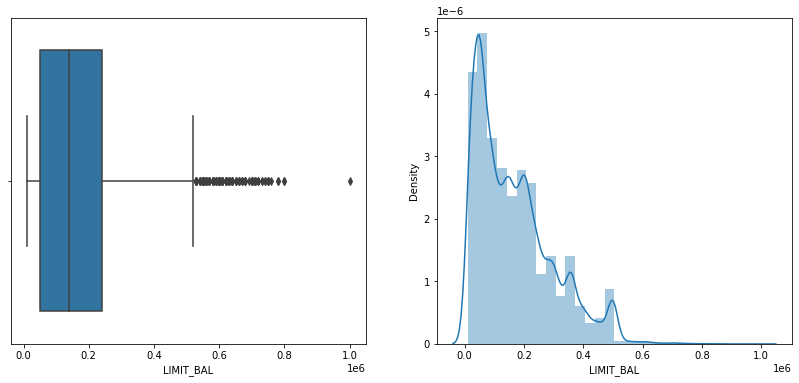

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
The upper and lower bounds for suspected outliers are 525000.0 and -235000.0


In [ ]:
# finding the outliers
### limit_bal
print('Visulaize Limit_bal Feature')
visualize_num_feature(df.LIMIT_BAL)
stat_summary(df.LIMIT_BAL)

Visulaize BILL_AMT1 Feature


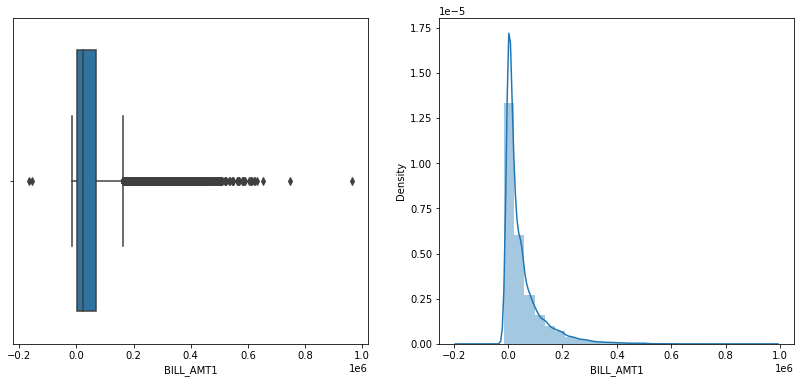

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64
The upper and lower bounds for suspected outliers are 162389.375 and -91739.625


In [ ]:
# finding the outliers
### BILL_AMT1
print('Visulaize BILL_AMT1 Feature')
visualize_num_feature(df.BILL_AMT1)
stat_summary(df.BILL_AMT1)

Visulaize BILL_AMT2 Feature


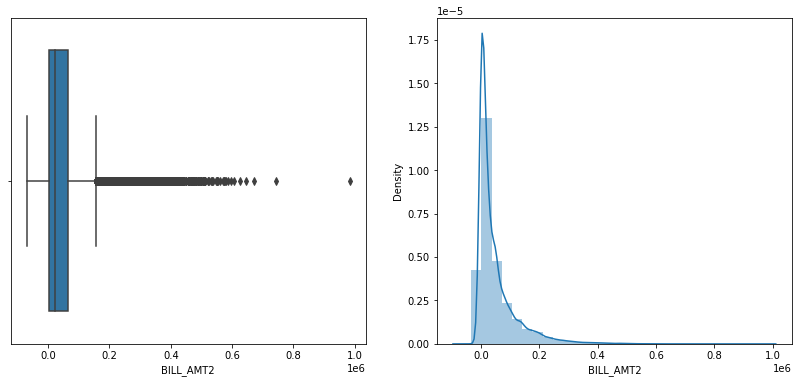

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64
The upper and lower bounds for suspected outliers are 155538.5 and -88547.5


In [ ]:
# finding the outliers
### BILL_AMT2
print('Visulaize BILL_AMT2 Feature')
visualize_num_feature(df.BILL_AMT2)
stat_summary(df.BILL_AMT2)

Text(0.5, 1.0, 'Credit Card Default Counts')

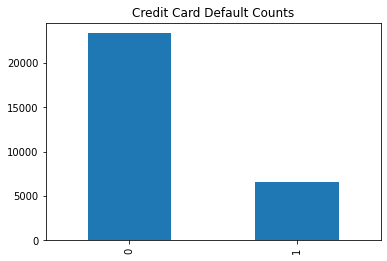

In [ ]:
# finding the data inbalance
pd.value_counts(df['default payment next month']).plot.bar()
plt.title("Credit Card Default Counts")

In [ ]:
# Numerical Values of Defaulters
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
# Gender (1 = male; 2 = female).
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# In ['GENDER'] column in the dataset the gender was presenting in 1 or 2 value for male / female so we are changing it to be 0 and 1
# Sex  0 for male ; 1 for female

df['SEX'] =  [ 0 if x==1 else 1 for x in df['SEX']]
df['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

In [ ]:
#first look
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,1,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,1,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,1,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,0,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,0,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,0,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,1,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,1,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
#Unique value in "EDUCATION" column
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

##**Step 2: Data Visualisation and Analysis**

In [ ]:
# defining the function which help in calcultion of percentage 
def calculate_percentage (default_count, total_count, label):
    print(("Percentage of {} is {} %").format(label, math.modf((total_count * 100) / default_count)))


In [ ]:
# Arranging or filtering the values for proper visualization
# [1 = graduate school; 2 = university; 3 = high school; 4 = others]
# preparing the vairable for the diagram
EDUCATION_RANGE= [1,2,3,4]
school= df['EDUCATION'][df['EDUCATION']==1].count()
school_default = df['EDUCATION'][(df['EDUCATION']==1)&(df['default payment next month'])].count()

university= df['EDUCATION'][df['EDUCATION']==2].count()
university_default = df['EDUCATION'][(df['EDUCATION']==2)&(df['default payment next month'])].count()

high_school= df['EDUCATION'][df['EDUCATION']==3].count()
high_school_default = df['EDUCATION'][(df['EDUCATION']==3)&(df['default payment next month'])].count()

others= df['EDUCATION'][df['EDUCATION']==4].count()
others_default = df['EDUCATION'][(df['EDUCATION']==4)&(df['default payment next month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


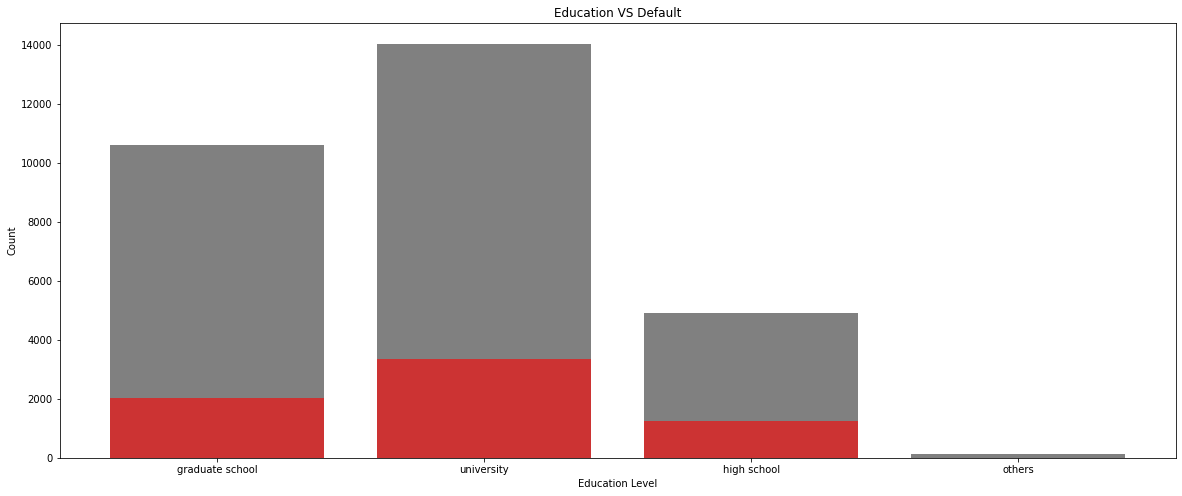

Percentage of Graduate School Default is (0.23476617855455828, 19.0) %
Percentage of University Default is (0.7348538845331447, 23.0) %
Percentage of High school Default is (0.15761643278421644, 25.0) %
Percentage of Others Default is (0.691056910569106, 5.0) %


In [ ]:
# plotting bar graph between education level and the default
plt.figure(figsize=(20,8))
plt.bar(EDUCATION_RANGE , education_total,color='grey',alpha = 1)
plt.bar(EDUCATION_RANGE , default_education_total,color='red', alpha = 0.6)
plt.xticks(EDUCATION_RANGE,['graduate school','university','high school','others'])
plt.title("Education VS Default")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

calculate_percentage(school,school_default,"Graduate School Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")



In [ ]:
# Arranging or filtering the values for proper visualization
# male = 0 , female = 1
# preparing the vairable for the diagram

GENDER_RANGE= [0,1]

male= df['SEX'][df['SEX']==0].count()
male_default = df['SEX'][(df['SEX']==0)&(df['default payment next month']==1)].count()

female=df['SEX'][df['SEX']==1].count()
female_default = df['SEX'][(df['SEX']==1)&(df['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]




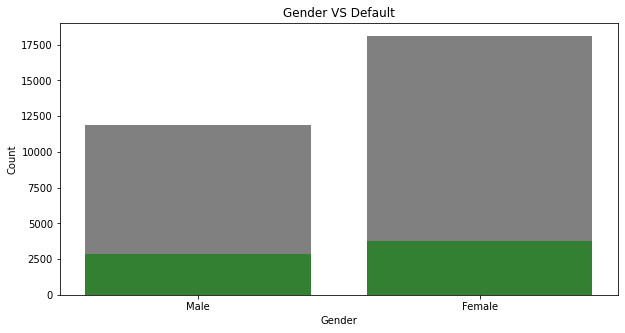

Percentage of Male Default is (0.16722745625841284, 24.0) %
Percentage of Female Default is (0.7762809187279167, 20.0) %


In [ ]:
## Plotting the bar plot between the gender and the default
plt.figure(figsize=(10,5))
plt.bar(GENDER_RANGE,gender_total, color='grey')
plt.bar(GENDER_RANGE,default_gender_total, color='green',alpha = 0.6)
plt.xticks([0,1],['Male','Female'])
plt.title("Gender VS Default")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

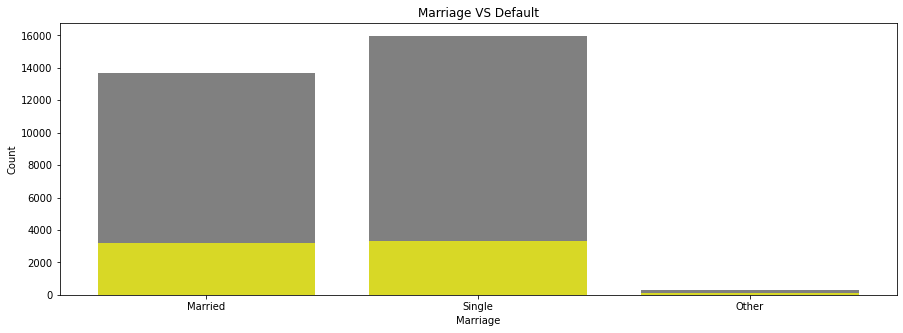

Percentage of Married Default is (0.47170363862654696, 23.0) %
Percentage of Single Default is (0.9283387622149846, 20.0) %
Percentage of Others Default is (0.00619195046439458, 26.0) %


In [ ]:
# Arranging or filtering the values for proper visualization
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram

MARRIAGE_RANGE= [1,2,3]


married= df['MARRIAGE'][df['MARRIAGE']==1].count()
married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)].count()

single=df['MARRIAGE'][df['MARRIAGE']==2].count()
single_default = df['MARRIAGE'][(df['MARRIAGE']==2)&(df['default payment next month']==1)].count()

others=df['MARRIAGE'][df['MARRIAGE']==3].count()
others_default = df['MARRIAGE'][(df['MARRIAGE']==3)&(df['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

# plotting bar plot between marriage and default 
plt.figure(figsize=(15,5))
plt.bar(MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.title("Marriage VS Default")
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")


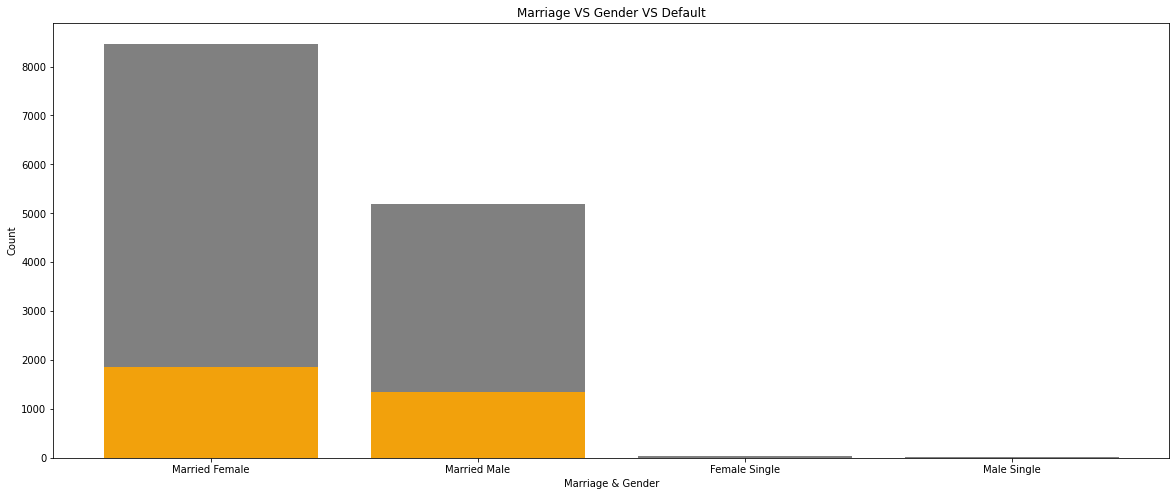

Percentage of Married Female Default is (0.9624512929507603, 21.0) %
Percentage of Married Male Default is (0.9344894026974941, 25.0) %
Percentage of Single Female Default is (0.5, 7.0) %
Percentage of Single Male Default is (0.2857142857142865, 14.0) %


In [ ]:
# Arranging or filtering the values for proper visualization
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram

MARRIAGE_RANGE= [1,2,3,4]

female_married= df['MARRIAGE'][(df['MARRIAGE']==1)&(df['SEX']==1)].count()
female_married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)&(df['SEX']==1)].count()

male_married= df['MARRIAGE'][(df['MARRIAGE']==1)&(df['SEX']==0)].count()
male_married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)&(df['SEX']==0)].count()

female_single= df['MARRIAGE'][(df['MARRIAGE']==0)&(df['SEX']==1)].count()
female_single_default = df['MARRIAGE'][(df['MARRIAGE']==0)&(df['default payment next month']==1)&(df['SEX']==1)].count()

male_single= df['MARRIAGE'][(df['MARRIAGE']==0)&(df['SEX']==0)].count()
male_single_default = df['MARRIAGE'][(df['MARRIAGE']==0)&(df['default payment next month']==1)&(df['SEX']==0)].count()


marriage_gender_total = [female_married,male_married,female_single,male_single]
default_marriage_gender_total = [female_married_default,male_married_default,female_single_default,male_single_default]

# plotting the bar plot between the Marriage(Gender) and Default
plt.figure(figsize=(20,8))
plt.bar(MARRIAGE_RANGE,marriage_gender_total, color='grey')
plt.bar(MARRIAGE_RANGE,default_marriage_gender_total, color='Orange',alpha = 0.9)
plt.xticks(MARRIAGE_RANGE,['Married Female','Married Male','Female Single', 'Male Single'])
plt.title("Marriage VS Gender VS Default")
plt.xlabel('Marriage & Gender')
plt.ylabel('Count')
plt.show()

calculate_percentage(female_married,female_married_default,"Married Female Default")
calculate_percentage(male_married,male_married_default,"Married Male Default")
calculate_percentage(female_single,female_single_default,"Single Female Default")
calculate_percentage(male_single,male_single_default,"Single Male Default")

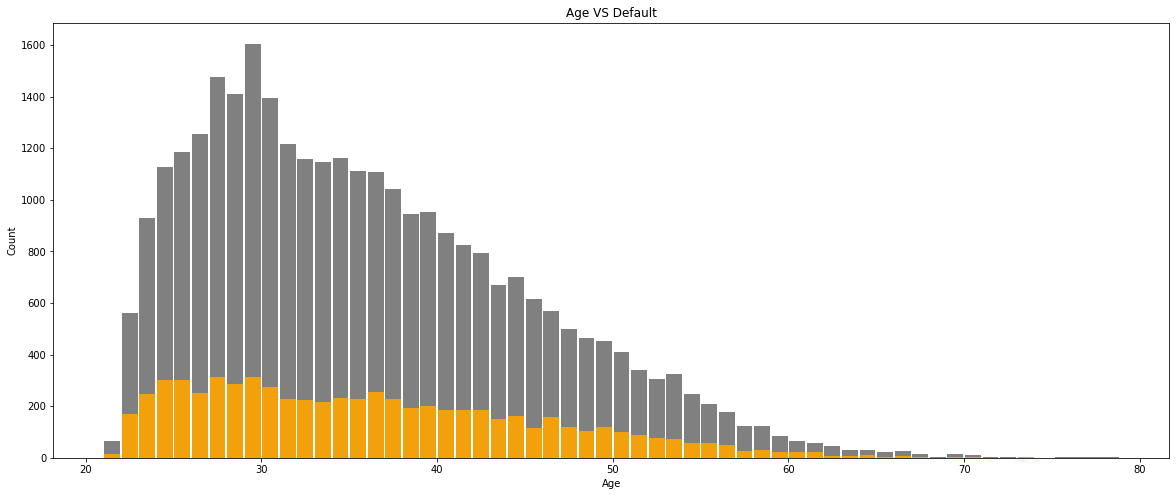

Percentage of 21 is (0.8955223880597032, 20.0) %
Percentage of 22 is (0.17857142857142705, 30.0) %
Percentage of 23 is (0.5306122448979593, 26.0) %
Percentage of 24 is (0.6193433895297247, 26.0) %
Percentage of 25 is (0.46374367622259527, 25.0) %
Percentage of 26 is (0.14331210191082633, 20.0) %
Percentage of 27 is (0.19160460392687995, 21.0) %
Percentage of 28 is (0.2980837473385378, 20.0) %
Percentage of 29 is (0.5015576323987538, 19.0) %
Percentage of 30 is (0.6415770609319011, 19.0) %
Percentage of 31 is (0.8167625308134774, 18.0) %
Percentage of 32 is (0.4300518134715041, 19.0) %
Percentage of 33 is (0.7609075043630007, 18.0) %
Percentage of 34 is (0.8795180722891551, 19.0) %
Percentage of 35 is (0.30548068283917473, 20.0) %
Percentage of 36 is (0.9241877256317679, 22.0) %
Percentage of 37 is (0.9980787704130627, 21.0) %
Percentage of 38 is (0.5508474576271176, 20.0) %
Percentage of 39 is (0.8595387840670874, 20.0) %
Percentage of 40 is (0.49425287356321945, 21.0) %
Percentage of 

In [ ]:
## Plotting the bar plot between the Age and The Default
plt.figure(figsize=(20,8))
plt.title("Age VS Default")
plt.hist(df['AGE'], sorted(df['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(df['AGE'].unique()),rwidth=0.9,color='orange',alpha = 0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



for x in sorted(df['AGE'].unique()):
    calculate_percentage(
                         df['AGE'][df['AGE']==x ].count(),df['AGE'][(df['AGE']==x )&(df['default payment next month']==1)].count(), x)

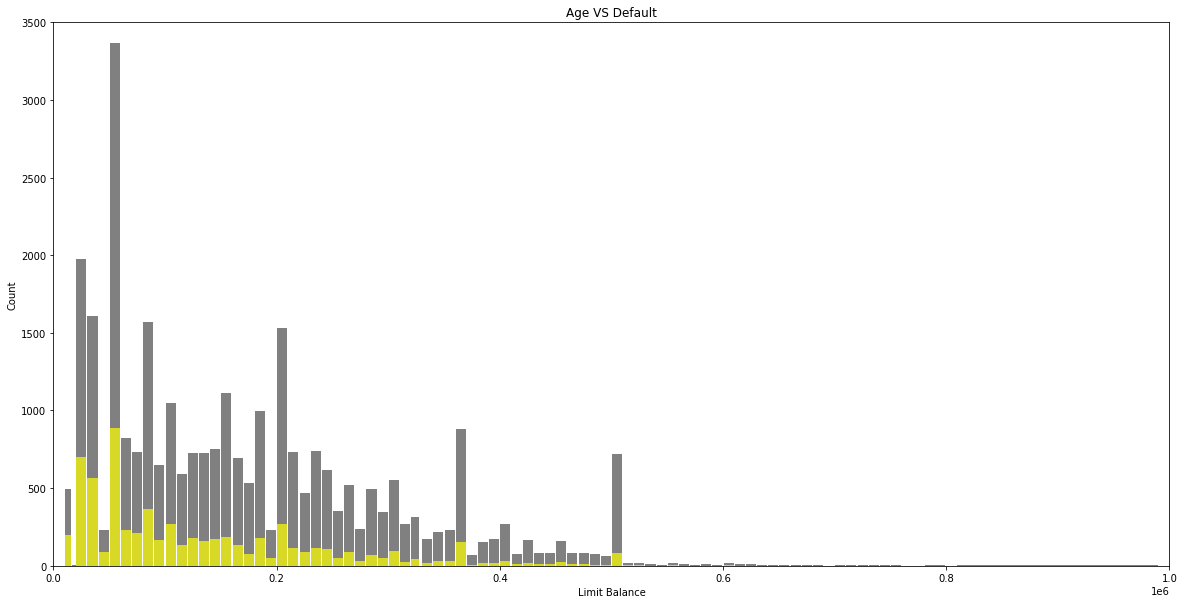

In [ ]:
# plotting the bar graph between the Limit amount and The Defaults 
#LIMIT_BAL
plt.figure(figsize=(20,10))
plt.hist(df['LIMIT_BAL'], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['LIMIT_BAL'][(df['default payment next month']==1)], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title("Age VS Default")
plt.axis([0,1000000,0,3500])
plt.show()